In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3 as sql

In [2]:
# reading data from sqlite
con = sql.connect(r"zomato_rawdata.sqlite")

In [3]:
df = pd.read_sql_query("select * from users", con)
df.head()

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   
2      2  https://www.zomato.com/SanchurroBangalore?cont...   
3      3  https://www.zomato.com/bangalore/addhuri-udupi...   
4      4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [4]:
df.shape

(51717, 18)

In [5]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

**=> Dealing with null values**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        51717 non-null  int64 
 1   url                          51717 non-null  object
 2   address                      51717 non-null  object
 3   name                         51717 non-null  object
 4   online_order                 51717 non-null  object
 5   book_table                   51717 non-null  object
 6   rate                         43942 non-null  object
 7   votes                        51717 non-null  int64 
 8   phone                        50509 non-null  object
 9   location                     51696 non-null  object
 10  rest_type                    51490 non-null  object
 11  dish_liked                   23639 non-null  object
 12  cuisines                     51672 non-null  object
 13  approx_cost(for two people)  51

In [7]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
#ratio of null values
(df.isnull().sum()/len(df))*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
df['rate'].replace(('NEW', '-'), np.nan, inplace=True)

C:\Users\FaNi\AppData\Local\Temp\ipykernel_3052\2440393970.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].replace(('NEW', '-'), np.nan, inplace=True)


In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
# we need rating as 4.1 not as '4.1/5' , ie we need to fix it ..
'4.1/5'.split('/')[0]

'4.1'

In [13]:
# rating is string convert it to float
df["rate"] = df["rate"].apply(lambda x: float(x.split("/")[0]) if type(x)==str else x)

In [14]:
df['rate'].isnull().sum()

10052

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        51717 non-null  int64  
 1   url                          51717 non-null  object 
 2   address                      51717 non-null  object 
 3   name                         51717 non-null  object 
 4   online_order                 51717 non-null  object 
 5   book_table                   51717 non-null  object 
 6   rate                         41665 non-null  float64
 7   votes                        51717 non-null  int64  
 8   phone                        50509 non-null  object 
 9   location                     51696 non-null  object 
 10  rest_type                    51490 non-null  object 
 11  dish_liked                   23639 non-null  object 
 12  cuisines                     51672 non-null  object 
 13  approx_cost(for 

**Avg rating of resturents**

In [16]:
# lets find out relation b/w rating & online_order
# we will create frequency tables..
frequnce = pd.crosstab(df['rate'] , df['online_order'])
frequnce.head()

online_order  No  Yes
rate                 
1.8            5    0
2.0           11    0
2.1            9   15
2.2           10   16
2.3           29   22

In [17]:
resturent_rating = df.groupby('name')['rate'].mean().to_frame().reset_index()
resturent_rating.head()

name  rate
0            #FeelTheROLL   3.4
1              #L-81 Cafe   3.9
2           #Vibes Restro   NaN
3                 #refuel   3.7
4  'Brahmins' Thatte Idli   NaN

In [18]:
resturent_rating.columns = ['resturent', 'avg_rating']

In [19]:
resturent_rating.head()

resturent  avg_rating
0            #FeelTheROLL         3.4
1              #L-81 Cafe         3.9
2           #Vibes Restro         NaN
3                 #refuel         3.7
4  'Brahmins' Thatte Idli         NaN

**Get distribution of rating and analyze what distribution is**

Text(0, 0.5, 'Frequency')

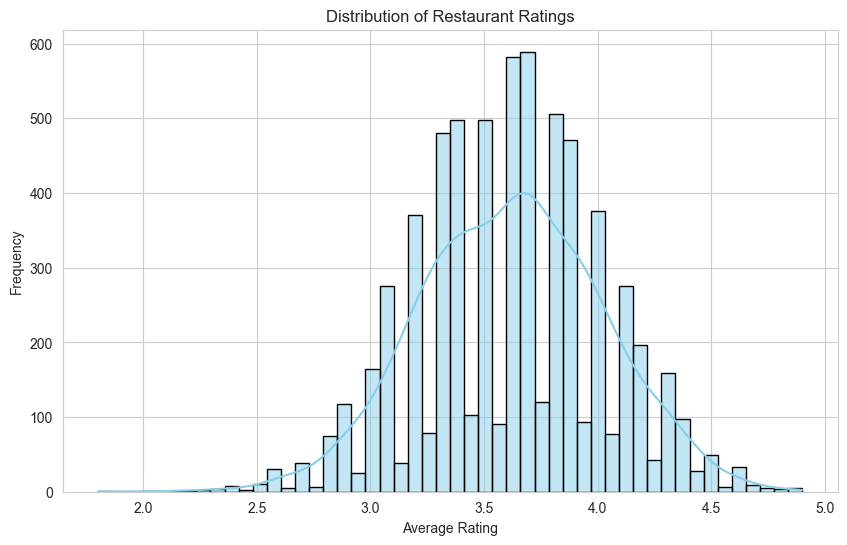

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=resturent_rating, x='avg_rating',bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

# as data is normaly distributed and most of th rating fall between 3.5 to 4

**Top resturent chain in bangloroe**

In [21]:
df.head()

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   
2      2  https://www.zomato.com/SanchurroBangalore?cont...   
3      3  https://www.zomato.com/bangalore/addhuri-udupi...   
4      4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [22]:
chain = df['name'].value_counts()[:20]
chain

name
Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Chef Baker's         62
Pizza Hut            62
Domino's Pizza       60
KFC                  60
Sweet Truth          60
Subway               60
Beijing Bites        60
Smoor                59
McDonald's           59
Chai Point           58
Faasos               57
Name: count, dtype: int64

C:\Users\FaNi\AppData\Local\Temp\ipykernel_3052\1154044795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns_barplot = sns.barplot(x=chain, y=chain.index, palette='viridis')


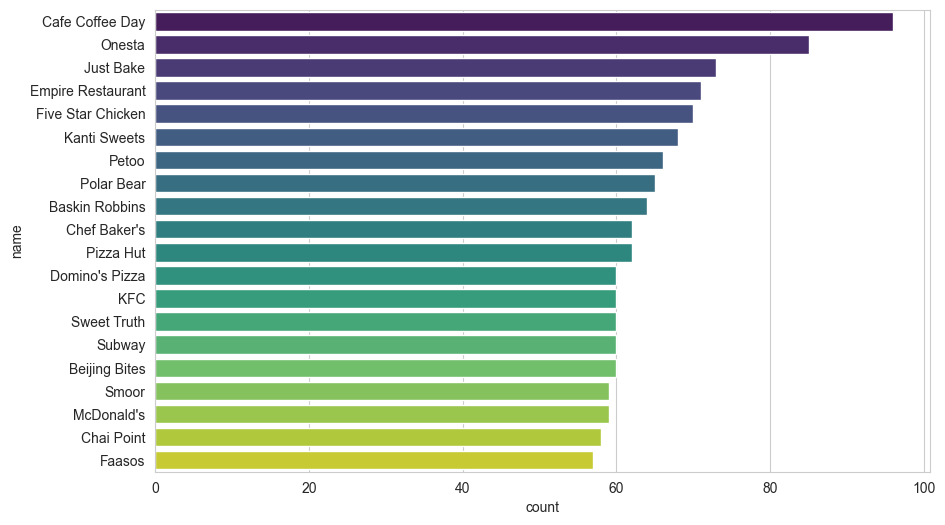

In [23]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns_barplot = sns.barplot(x=chain, y=chain.index, palette='viridis')

**how many donot accept online order**

In [24]:
online_order = df['online_order'].value_counts()
online_order

online_order
Yes    30444
No     21273
Name: count, dtype: int64

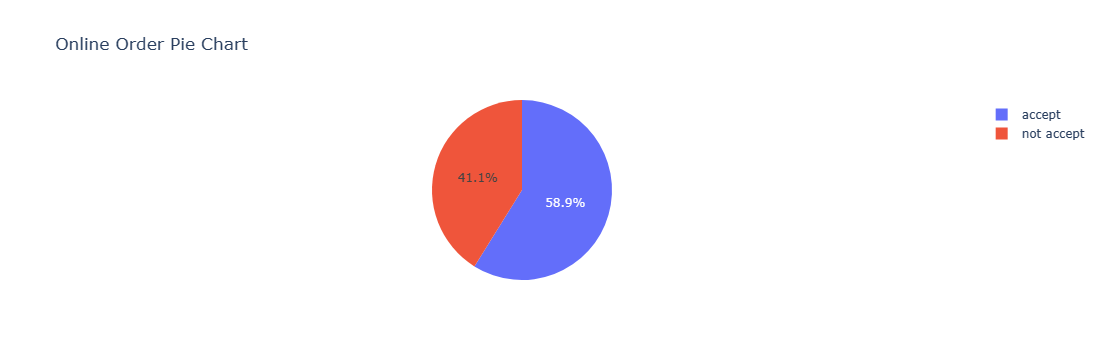

In [25]:
import plotly.express as px
labels = ['accept', 'not accept']
px.pie(values=online_order, names=labels, title="Online Order Pie Chart")

**Ratio of resturnests with table and without table**

In [26]:
book_table = df['book_table'].value_counts()
book_table

book_table
No     45268
Yes     6449
Name: count, dtype: int64

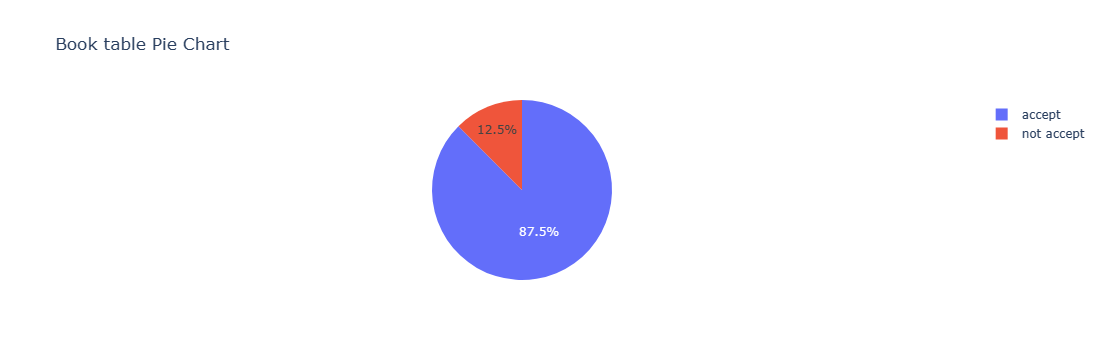

In [27]:
labels = ['accept', 'not accept']
px.pie(values=book_table, names=labels, title="Book table Pie Chart")

**Types of resturents we have in data**

In [28]:
df['rest_type'].isna().sum()

227

In [29]:
df['rest_type'].dropna()

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 51490, dtype: object

In [30]:
df['rest_type'].isnull().sum()

227

In [31]:
df.dropna(subset='rest_type',inplace=True)

In [32]:
df['rest_type'].isnull().sum()

0

In [33]:
len(df['rest_type'].unique())

93

C:\Users\FaNi\AppData\Local\Temp\ipykernel_3052\1515399771.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Top 20 Restaurant Types')

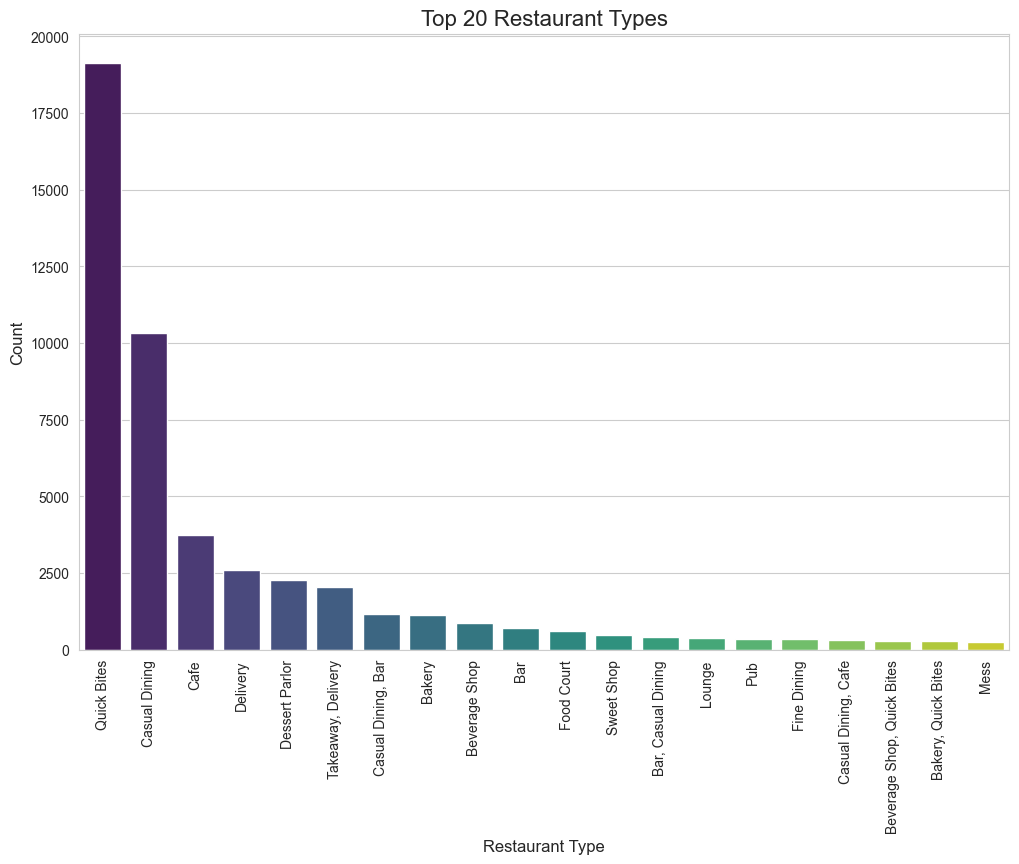

In [34]:
plt.figure(figsize=(12, 8))  
sns.barplot(x=df['rest_type'].value_counts().nlargest(20).index, 
            y=df['rest_type'].value_counts().nlargest(20),
            palette='viridis')  

plt.xticks(rotation=90) 
plt.xlabel('Restaurant Type', fontsize=12)  
plt.ylabel('Count', fontsize=12)  
plt.title('Top 20 Restaurant Types', fontsize=16)

**highest voted resturents**

<Axes: xlabel='name'>

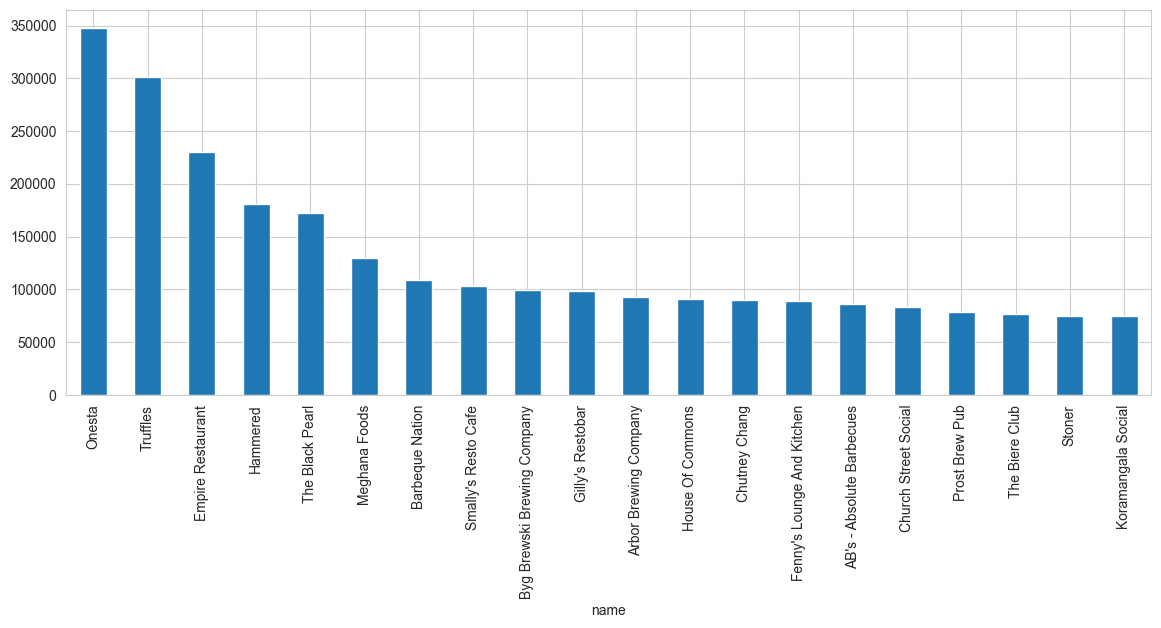

In [35]:
plt.figure(figsize=(14,5))
df.groupby('name')['votes'].sum().nlargest(20).plot(kind='bar')

**Total resturents at different location of the banglore**

In [36]:
resturent = []
location = []
for key, location_df in df.groupby('location'):
    location.append(key)
    resturent.append(len(location_df['name'].unique()))


In [37]:
df_total = pd.DataFrame(zip(resturent,location))
df_total.head()

0                  1
0  696                BTM
1  283       Banashankari
2  201          Banaswadi
3  446  Bannerghatta Road
4  205       Basavanagudi

In [38]:
df_total.columns = ["resturent", "location"]

In [39]:
df_total

resturent           location
0         696                BTM
1         283       Banashankari
2         201          Banaswadi
3         446  Bannerghatta Road
4         205       Basavanagudi
..        ...                ...
88          4     West Bangalore
89        820         Whitefield
90         49      Wilson Garden
91          4          Yelahanka
92         69        Yeshwantpur

[93 rows x 2 columns]

In [40]:
df_total.set_index('location', inplace=True)

In [41]:
df_total.head()

resturent
location                    
BTM                      696
Banashankari             283
Banaswadi                201
Bannerghatta Road        446
Basavanagudi             205

<Axes: xlabel='location'>

<Figure size 1000x400 with 0 Axes>

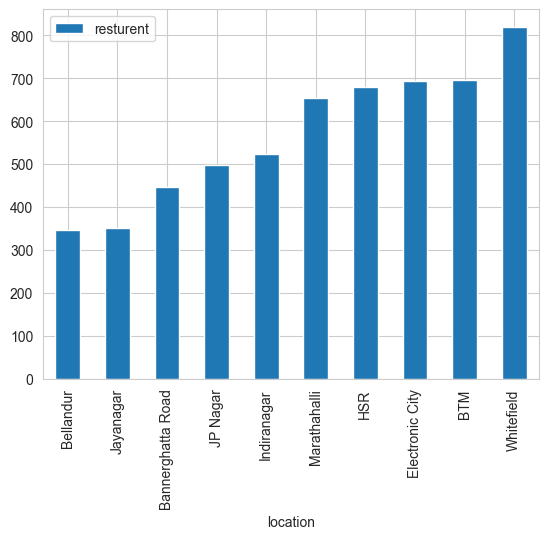

In [42]:
plt.figure(figsize=(10,4))
df_total.sort_values(by='resturent').tail(10).plot(kind='bar')

**Analzing price of resturent**

**Total number of verity of resturent in Bangalore**

In [43]:
df['cuisines'].value_counts()[:10]

cuisines
North Indian                           2899
North Indian, Chinese                  2361
South Indian                           1828
Biryani                                 909
Bakery, Desserts                        907
Fast Food                               803
Desserts                                766
Cafe                                    756
South Indian, North Indian, Chinese     726
Bakery                                  649
Name: count, dtype: int64

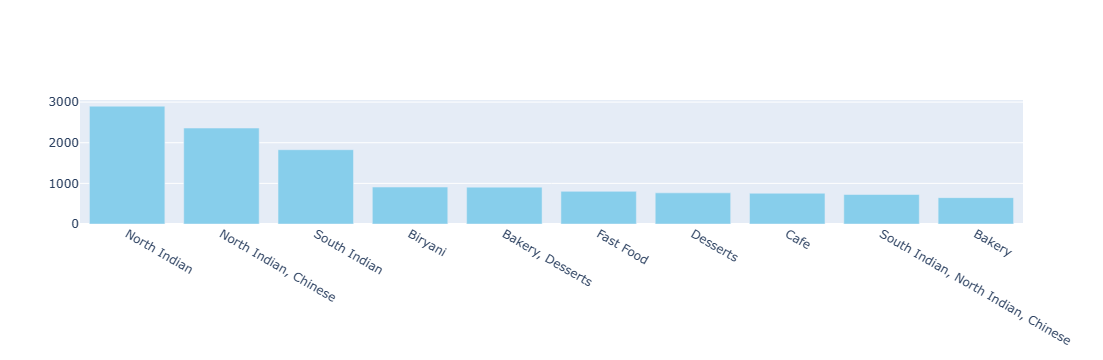

In [44]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df['cuisines'].value_counts()[:10].index,
    y=df['cuisines'].value_counts()[:10],
    marker_color='skyblue',  # Adjust bar color
))

**Analyze approx cost of two people feature**

In [45]:
df.columns # 'approx_cost(for two people)

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [46]:
df['approx_cost(for two people)'].isna().sum()

323

In [47]:
df.dropna(subset='approx_cost(for two people)', inplace=True)

In [48]:
df['approx_cost(for two people)'].isna().sum()

0

In [49]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [50]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [51]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', '1400', '180', '1350', '2200',
       '2000', '1800', '1900', '330', '2500', '2100', '3000', '2800',
       '3400', '40', '1250', '3500', '4000', '2400', '2600', '120',
       '1450', '469', '70', '3200', '60', '560', '240', '360', '6000',
       '1050', '2300', '4100', '5000', '3700', '1650', '2700', '4500',
       '140'], dtype=object)

In [52]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)

In [53]:
df['approx_cost(for two people)'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140])

In [54]:
df['approx_cost(for two people)'].dtype

dtype('int32')

**approx cose of 2 people vs rating**

Text(0.5, 1.0, 'Distribution of Approximate Cost for Two People')

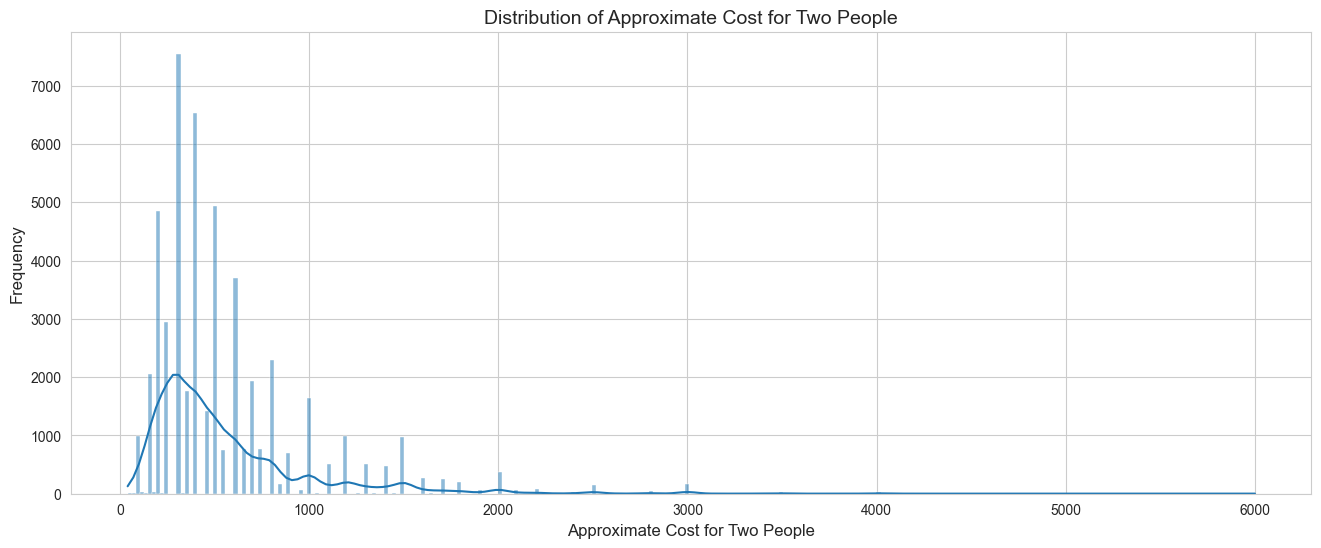

In [55]:
plt.figure(figsize=(16, 6))

# Create the distribution plot using Seaborn
sns.histplot(df['approx_cost(for two people)'], kde=True)

# Add labels and title
plt.xlabel('Approximate Cost for Two People', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Approximate Cost for Two People', fontsize=14)


<Axes: xlabel='rate', ylabel='approx_cost(for two people)'>

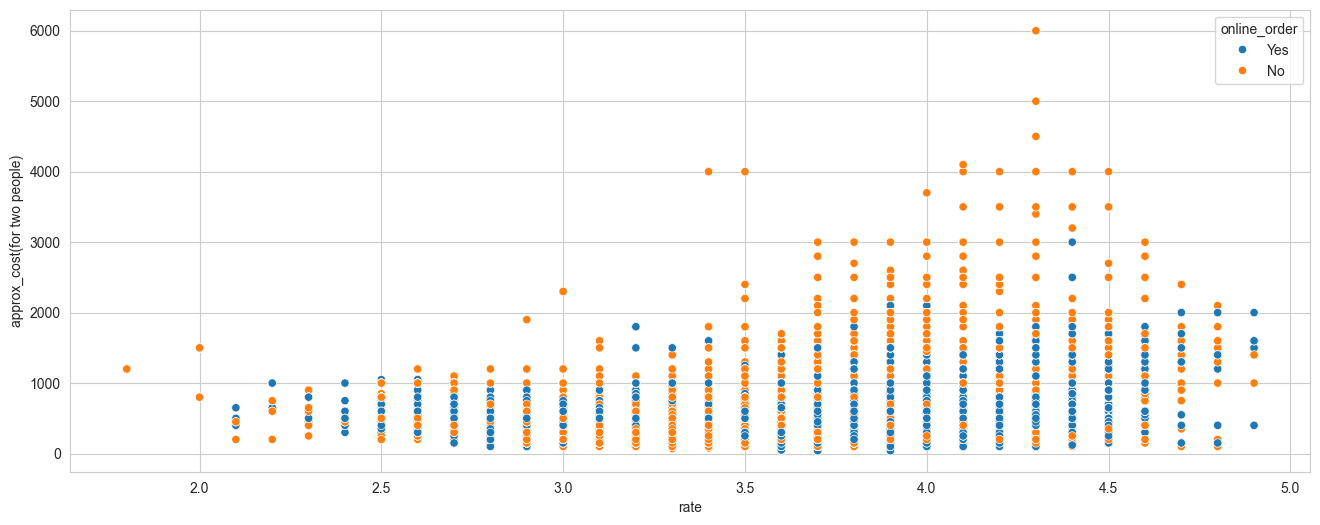

In [56]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x=df['rate'],y=df['approx_cost(for two people)'], hue=df['online_order'])

**votes of accepting and not accepting**

<Axes: xlabel='online_order', ylabel='votes'>

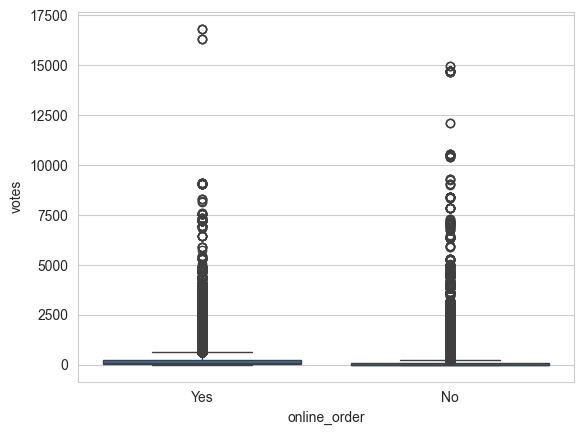

In [57]:
sns.boxplot(x=df['online_order'], y=df['votes'])

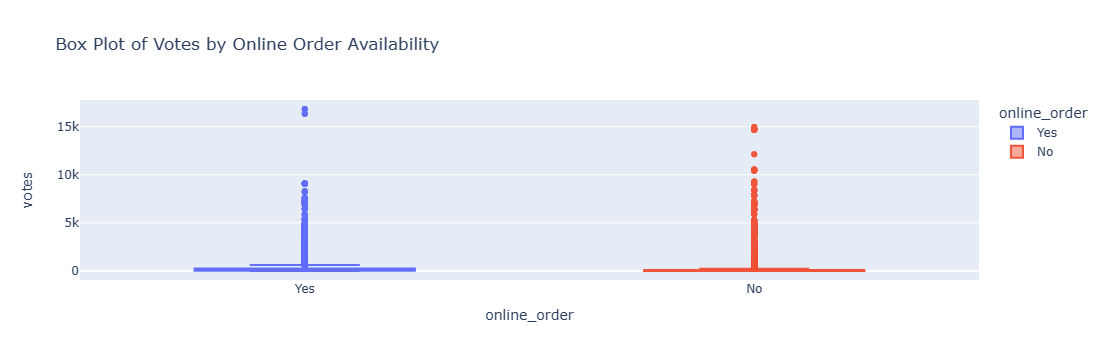

In [58]:
import plotly.express as px

# Assuming df is your DataFrame containing the 'online_order' and 'votes' columns

# Create the box plot using Plotly Express
px.box(df, x='online_order', y='votes', color='online_order',
            title='Box Plot of Votes by Online Order Availability')

**difference between price of resturent accepting and not acceptin price**

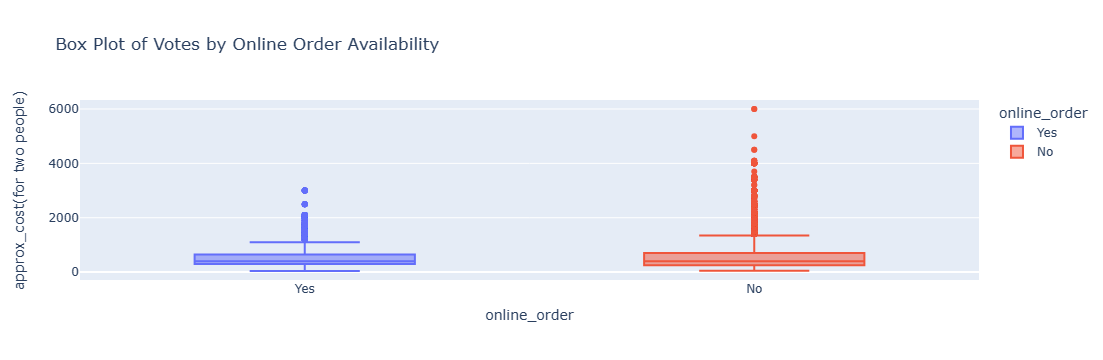

In [59]:
px.box(df, x='online_order', y='approx_cost(for two people)', color='online_order',
            title='Box Plot of Votes by Online Order Availability')

**luxury hotel in Bangalore**

In [60]:
df['approx_cost(for two people)'].max()

6000

In [61]:
df[df['approx_cost(for two people)'] == 600]['name']

4                       Grand Village
5                     Timepass Dinner
7                              Onesta
11                       Cafe Shuffle
23                       My Tea House
                     ...             
51509                    Purani Dehli
51579              Arabian Fame Grill
51620                  Fujian Express
51621    The Deli - The Den Bengaluru
51713        Vinod Bar And Restaurant
Name: name, Length: 3693, dtype: object

**Top 10 most expensive resturents with approx 2 people**

In [62]:
data = df.copy()

In [63]:
data.head()

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   
2      2  https://www.zomato.com/SanchurroBangalore?cont...   
3      3  https://www.zomato.com/bangalore/addhuri-udupi...   
4      4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [64]:
data.set_index('name', inplace=True)

In [65]:
data.head()

index  \
name                           
Jalsa                      0   
Spice Elephant             1   
San Churro Cafe            2   
Addhuri Udupi Bhojana      3   
Grand Village              4   

                                                                     url  \
name                                                                       
Jalsa                  https://www.zomato.com/bangalore/jalsa-banasha...   
Spice Elephant         https://www.zomato.com/bangalore/spice-elephan...   
San Churro Cafe        https://www.zomato.com/SanchurroBangalore?cont...   
Addhuri Udupi Bhojana  https://www.zomato.com/bangalore/addhuri-udupi...   
Grand Village          https://www.zomato.com/bangalore/grand-village...   

                                                                 address  \
name                                                                       
Jalsa                  942, 21st Main Road, 2nd Stage, Banashankari, ...   
Spice Elephant         2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
San Churro Cafe        1112, Next to KIMS Medical College, 17th Cross...   
Addhuri Udupi Bhojana  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
Grand Village          10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   

                      online_order book_table  rate  votes  \
name                                                         
Jalsa                          Yes        Yes   4.1    775   
Spice Elephant                 Yes         No   4.1    787   
San Churro Cafe                Yes         No   3.8    918   
Addhuri Udupi Bhojana           No         No   3.7     88   
Grand Village                   No         No   3.8    166   

                                                  phone      location  \
name                                                                    
Jalsa                    080 42297555\r\n+91 9743772233  Banashankari   
Spice Elephant                             080 41714161  Banashankari   
San Churro Cafe                          +91 9663487993  Banashankari   
Addhuri Udupi Bhojana                    +91 9620009302  Banashankari   
Grand Village          +91 8026612447\r\n+91 9901210005  Basavanagudi   

                                 rest_type  \
name                                         
Jalsa                        Casual Dining   
Spice Elephant               Casual Dining   
San Churro Cafe        Cafe, Casual Dining   
Addhuri Udupi Bhojana          Quick Bites   
Grand Village                Casual Dining   

                                                              dish_liked  \
name                                                                       
Jalsa                  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
Spice Elephant         Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
San Churro Cafe        Churros, Cannelloni, Minestrone Soup, Hot Choc...   
Addhuri Udupi Bhojana                                        Masala Dosa   
Grand Village                                        Panipuri, Gol Gappe   

                                             cuisines  \
name                                                    
Jalsa                  North Indian, Mughlai, Chinese   
Spice Elephant            Chinese, North Indian, Thai   
San Churro Cafe                Cafe, Mexican, Italian   
Addhuri Udupi Bhojana      South Indian, North Indian   
Grand Village                North Indian, Rajasthani   

                       approx_cost(for two people)  \
name                                                 
Jalsa                                          800   
Spice Elephant                                 800   
San Churro Cafe                                800   
Addhuri Udupi Bhojana                          300   
Grand Village                                  600   

                                                            reviews_list  \
name                                                                      

<Axes: xlabel='name'>

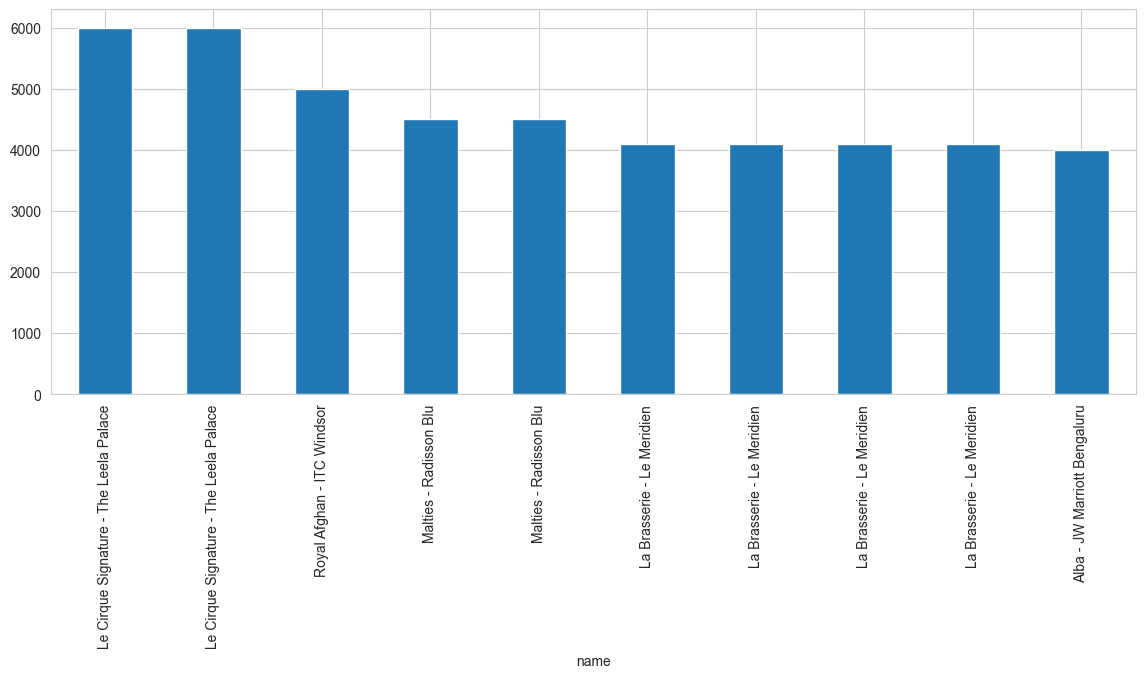

In [66]:
plt.figure(figsize=(14,5))
data['approx_cost(for two people)'].nlargest(10).plot(kind='bar')

<Axes: xlabel='name'>

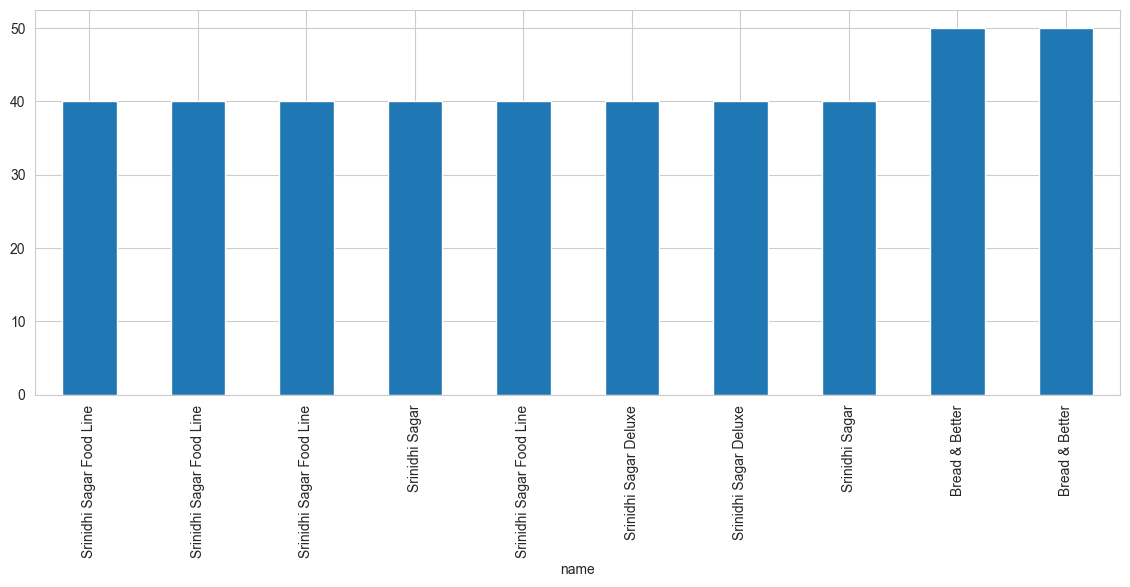

In [67]:
# cheapest resturents
plt.figure(figsize=(14,5))
data['approx_cost(for two people)'].nsmallest(10).plot(kind='bar')

In [68]:
data[data['approx_cost(for two people)']<=500]

index  \
name                                                        
Addhuri Udupi Bhojana                                   3   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley     10   
The Coffee Shack                                       12   
Caf-Eleven                                             13   
T3H Cafe                                               18   
...                                                   ...   
Punjabi Charchay                                    51640   
Basaveshwara Khanavali                              51642   
New Ambur Biryani                                   51643   
Punjabi Thadka                                      51644   
Raapchick                                           51645   

                                                                                                  url  \
name                                                                                                    
Addhuri Udupi Bhojana                               https://www.zomato.com/bangalore/addhuri-udupi...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
The Coffee Shack                                    https://www.zomato.com/bangalore/the-coffee-sh...   
Caf-Eleven                                          https://www.zomato.com/bangalore/caf-eleven-ba...   
T3H Cafe                                            https://www.zomato.com/bangalore/t3h-cafe-bana...   
...                                                                                               ...   
Punjabi Charchay                                    https://www.zomato.com/bangalore/punjabi-charc...   
Basaveshwara Khanavali                              https://www.zomato.com/bangalore/basaveshwara-...   
New Ambur Biryani                                   https://www.zomato.com/bangalore/new-ambur-bir...   
Punjabi Thadka                                      https://www.zomato.com/bangalore/punjabi-thadk...   
Raapchick                                           https://www.zomato.com/bangalore/raapchick-bro...   

                                                                                              address  \
name                                                                                                    
Addhuri Udupi Bhojana                               1st Floor, Annakuteera, 3rd Stage, Banashankar...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  12,29 Near PES University Back Gate, D'Souza N...   
The Coffee Shack                                        6th Block, 3rd Stage, Banashankari, Bangalore   
Caf-Eleven                                          111, Sapphire Toys Building, 100 Feet Ring Roa...   
T3H Cafe                                            504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
...                                                                                               ...   
Punjabi Charchay                                    7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
Basaveshwara Khanavali                              Nanjudeshwari complex, Oppsite Brookefield Mal...   
New Ambur Biryani                                   AECS Layout, ITPL Main Road, Brookefield, Bang...   
Punjabi Thadka                                      7/3, ASK Tower, Kundanahalli Gate, Next to Bat...   
Raapchick                                           Opposite Brookefield Mall, Kundanhalli, Brooke...   

                                                   online_order book_table  \
name                                                                         
Addhuri Udupi Bhojana                                        No         No   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley          Yes         No   
The Coffee Shack                                            Yes        Yes   
Caf-Eleven                                                   No         No   
T3H Cafe                                                  

In [69]:
df_budget = data[data['approx_cost(for two people)'] <= 500]
df_budget = df_budget.loc[:, ['approx_cost(for two people)']]

In [70]:
df_budget.head()

approx_cost(for two people)
name                                                                           
Addhuri Udupi Bhojana                                                       300
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley                          500
The Coffee Shack                                                            500
Caf-Eleven                                                                  450
T3H Cafe                                                                    300

In [71]:
df_budget.reset_index()

name  \
0                                  Addhuri Udupi Bhojana   
1      CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...   
2                                       The Coffee Shack   
3                                             Caf-Eleven   
4                                               T3H Cafe   
...                                                  ...   
33118                                   Punjabi Charchay   
33119                             Basaveshwara Khanavali   
33120                                  New Ambur Biryani   
33121                                     Punjabi Thadka   
33122                                          Raapchick   

       approx_cost(for two people)  
0                              300  
1                              500  
2                              500  
3                              450  
4                              300  
...                            ...  
33118                          400  
33119                          200  
33120                          300  
33121                          400  
33122                          300  

[33123 rows x 2 columns]

In [72]:
df_budget.head()

approx_cost(for two people)
name                                                                           
Addhuri Udupi Bhojana                                                       300
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley                          500
The Coffee Shack                                                            500
Caf-Eleven                                                                  450
T3H Cafe                                                                    300

**Total resturents are in budget and rate >4**

In [73]:
df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)].shape #will get total entries of this condition

(2436, 18)

In [74]:
len(df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]['name'].unique())

372

**Total various of all affordable hotel**

In [75]:
df_new = df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]
df_new.head()

index                                                url  \
10     10  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
12     12  https://www.zomato.com/bangalore/the-coffee-sh...   
34     34  https://www.zomato.com/bangalore/faasos-banash...   
51     51  https://www.zomato.com/bangalore/shree-cool-po...   
52     52  https://www.zomato.com/bangalore/corner-house-...   

                                              address  \
10  12,29 Near PES University Back Gate, D'Souza N...   
12      6th Block, 3rd Stage, Banashankari, Bangalore   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
51  1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...   
52  808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...   

                                                 name online_order book_table  \
10  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes         No   
12                                   The Coffee Shack          Yes        Yes   
34                                             Faasos          Yes         No   
51                                   Shree Cool Point          Yes         No   
52                             Corner House Ice Cream           No         No   

    rate  votes                           phone      location       rest_type  \
10   4.1    402  080 26724489\r\n+91 7406048982  Banashankari            Cafe   
12   4.2    164                  +91 9731644212  Banashankari            Cafe   
34   4.2    415                  +91 7700020020  Banashankari     Quick Bites   
51   4.1     28                  +91 9900617124   Vijay Nagar     Quick Bites   
52   4.3    345  080 26713965\r\n+91 9845444155  Banashankari  Dessert Parlor   

                                           dish_liked  \
10  Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
12  Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
51                                               None   
52  Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...   

                               cuisines  approx_cost(for two people)  \
10                                 Cafe                          500   
12  Cafe, Chinese, Continental, Italian                          500   
34     North Indian, Biryani, Fast Food                          500   
51    Fast Food, Street Food, Beverages                          150   
52                  Ice Cream, Desserts                          400   

                                         reviews_list  \
10  [('Rated 4.0', 'RATED\n  We ended up here on a...   
12  [('Rated 4.0', "RATED\n  Food - 4/5\nAmbience ...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
51  [('Rated 5.0', 'RATED\n  Who would say no to s...   
52  [('Rated 3.0', "RATED\n  Always a fan of corne...   

                                            menu_item listed_in(type)  \
10                                                 []           Cafes   
12                                                 []           Cafes   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
51  ['Vegetable Sandwich', 'Vegetable Sandwich wit...        Delivery   
52                                                 []        Delivery   

   listed_in(city)  
10    Banashankari  
12    Banashankari  
34    Banashankari  
51    Banashankari  
52    Banashankari

In [76]:
location = []
total = []
for loc, location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [77]:
localtion_df = pd.DataFrame(zip(location,total))
localtion_df.head()

0   1
0                BTM  28
1       Banashankari  16
2          Banaswadi   1
3  Bannerghatta Road   9
4       Basavanagudi  24

In [78]:
localtion_df.columns = ['location', 'resturents']

In [79]:
localtion_df.head()

location  resturents
0                BTM          28
1       Banashankari          16
2          Banaswadi           1
3  Bannerghatta Road           9
4       Basavanagudi          24

**Find the best budget in an location of bangalore**

In [80]:
def budget_rest(location, resturent):
    budget_df = df[(df['rate']>4) & (df['approx_cost(for two people)']<=400)&(df['location']==location)&(df['rest_type']==resturent)]
    return budget_df['name'].unique()

In [81]:
budget_rest('BTM','Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

**find the foodie area in Bangalore**

C:\Users\FaNi\AppData\Local\Temp\ipykernel_3052\414527619.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Number of Restaurants in Each Location')

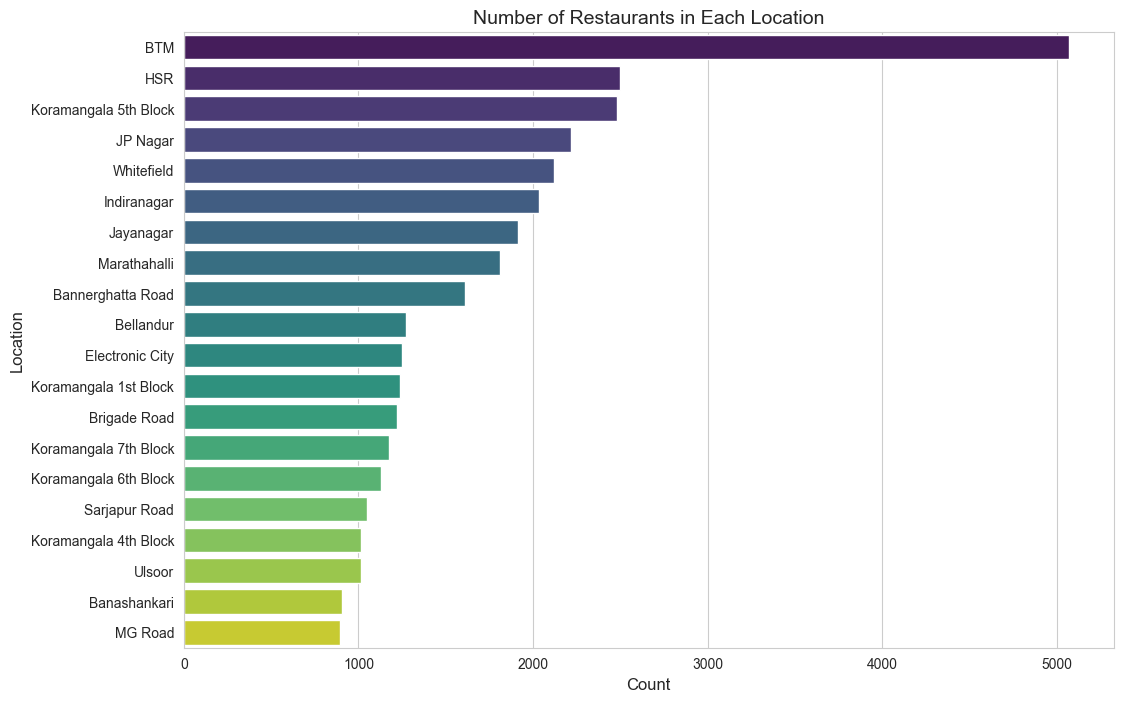

In [82]:
plt.figure(figsize=(12, 8))
foodie_area = df['location'].value_counts()[:20]
sns.barplot(x=foodie_area.values, y=foodie_area.index, palette='viridis')  

plt.xlabel('Count', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.title('Number of Restaurants in Each Location', fontsize=14)

**Spatial Analysis**

In [83]:
locations = pd.DataFrame({'name': df['location'].unique()})
locations.head()

name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [84]:
from geopy.geocoders import Nominatim

**Find latitude longitude of all location in Bangalore**

In [85]:
geolocator = Nominatim(user_agent='app')

In [86]:
lat_log = []
for loc in locations['name']:
    location = geolocator.geocode(loc)
    if location is None:
        lat_log.append(np.nan)
    else:
        geo = (location.latitude, location.longitude)
        lat_log.append(geo)

In [87]:
locations['geo_location'] = lat_log

In [88]:
locations.head()

name              geo_location
0        Banashankari  (15.8876779, 75.7046777)
1        Basavanagudi  (13.8345913, 75.7339359)
2         Mysore Road  (12.9467026, 77.5300705)
3           Jayanagar  (27.3493013, 95.3159407)
4  Kumaraswamy Layout  (12.9067683, 77.5595021)

In [89]:
rest_location = pd.DataFrame(df['location'].value_counts().reset_index())
rest_location.head()

location  count
0                    BTM   5071
1                    HSR   2496
2  Koramangala 5th Block   2481
3               JP Nagar   2219
4             Whitefield   2117

In [90]:
rest_location.columns = ['name', 'count']

In [91]:
rest_location.head()

name  count
0                    BTM   5071
1                    HSR   2496
2  Koramangala 5th Block   2481
3               JP Nagar   2219
4             Whitefield   2117

In [92]:
rest_location = rest_location.merge(locations, on='name', how='left').dropna()
rest_location.head()

name  count                        geo_location
0                    BTM   5071  (45.95485055, -112.49659530324134)
1                    HSR   2496            (29.1523467, 75.7245798)
2  Koramangala 5th Block   2481            (12.9348429, 77.6189768)
3               JP Nagar   2219            (12.9096941, 77.5866067)
4             Whitefield   2117            (53.5533682, -2.2969019)

In [93]:
lat, log = zip(*np.array(rest_location['geo_location']))

In [94]:
type(lat)

tuple

In [95]:
rest_location['lat'] = lat
rest_location['log'] = log

In [96]:
rest_location.head()

name  count                        geo_location  \
0                    BTM   5071  (45.95485055, -112.49659530324134)   
1                    HSR   2496            (29.1523467, 75.7245798)   
2  Koramangala 5th Block   2481            (12.9348429, 77.6189768)   
3               JP Nagar   2219            (12.9096941, 77.5866067)   
4             Whitefield   2117            (53.5533682, -2.2969019)   

         lat         log  
0  45.954851 -112.496595  
1  29.152347   75.724580  
2  12.934843   77.618977  
3  12.909694   77.586607  
4  53.553368   -2.296902

In [97]:
rest_location.drop('geo_location', axis=1, inplace=True)

In [98]:
rest_location.head()

name  count        lat         log
0                    BTM   5071  45.954851 -112.496595
1                    HSR   2496  29.152347   75.724580
2  Koramangala 5th Block   2481  12.934843   77.618977
3               JP Nagar   2219  12.909694   77.586607
4             Whitefield   2117  53.553368   -2.296902

**To create Map install (pip install folium)**

In [100]:
import folium
from folium.plugins import HeatMap

In [134]:
def basemap(location=[12.97, 77.59], zoom_start=12):
    base_map = folium.Map(location=location, zoom_start=zoom_start)
    return base_map

In [135]:
base_map = basemap()

In [136]:
base_map

**Heat map for resturent**

In [137]:
HeatMap(rest_location[['lat', 'log', 'count']].values.tolist(), zoom=20, radius=15).add_to(base_map)

In [138]:
base_map

**Heat map for the north Indean resturnts**

In [139]:
df2 = df[df['cuisines']== 'North Indian']
df2.head()

index                                                url  \
5       5  https://www.zomato.com/bangalore/timepass-dinn...   
50     50  https://www.zomato.com/bangalore/petoo-banasha...   
72     72  https://www.zomato.com/bangalore/spicy-tandoor...   
87     87  https://www.zomato.com/bangalore/krishna-sagar...   
94     94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table  rate  votes                             phone  \
5           Yes         No   3.8    286  +91 9980040002\r\n+91 9980063005   
50           No         No   3.7     21                    +91 8026893211   
72           No         No   NaN      0                    +91 8050884222   
87           No         No   3.5     31  +91 8892752997\r\n+91 7204780429   
94           No         No   2.6    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                               None  North Indian   
72                                               None  North Indian   
87                                               None  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

    approx_cost(for two people)  \
5                           600   
50                          450   
72                          150   
87                          200   
94                          600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  
5           Buffet    Banashankari  
50        Delivery    Banashankari  
72        Delivery    Banashankari  
87        Delivery    Banashankari  
94        Delivery    Banashankari

In [107]:
North_Indian = df2.groupby('location', as_index=False)['url'].agg('count')

In [108]:
North_Indian.head()

location  url
0                BTM  328
1       Banashankari   36
2          Banaswadi    8
3  Bannerghatta Road   75
4       Basavanagudi   21

In [109]:
North_Indian.columns = ['name', 'count']

In [110]:
North_Indian.head()

name  count
0                BTM    328
1       Banashankari     36
2          Banaswadi      8
3  Bannerghatta Road     75
4       Basavanagudi     21

In [111]:
North_Indian = North_Indian.merge(locations, on='name', how='left').dropna()

In [112]:
North_Indian.head()

name  count                        geo_location
0                BTM    328  (45.95485055, -112.49659530324134)
1       Banashankari     36            (15.8876779, 75.7046777)
2          Banaswadi      8            (13.0141618, 77.6518539)
3  Bannerghatta Road     75            (12.9354356, 77.6012795)
4       Basavanagudi     21            (13.8345913, 75.7339359)

In [113]:
North_Indian['lat'], North_Indian['log'] = zip(*North_Indian['geo_location'].values)

In [114]:
North_Indian.head()

name  count                        geo_location        lat  \
0                BTM    328  (45.95485055, -112.49659530324134)  45.954851   
1       Banashankari     36            (15.8876779, 75.7046777)  15.887678   
2          Banaswadi      8            (13.0141618, 77.6518539)  13.014162   
3  Bannerghatta Road     75            (12.9354356, 77.6012795)  12.935436   
4       Basavanagudi     21            (13.8345913, 75.7339359)  13.834591   

          log  
0 -112.496595  
1   75.704678  
2   77.651854  
3   77.601280  
4   75.733936

In [115]:
North_Indian.drop('geo_location', axis=1, inplace=True)

In [116]:
North_Indian.head()

name  count        lat         log
0                BTM    328  45.954851 -112.496595
1       Banashankari     36  15.887678   75.704678
2          Banaswadi      8  13.014162   77.651854
3  Bannerghatta Road     75  12.935436   77.601280
4       Basavanagudi     21  13.834591   75.733936

In [140]:
new_map = basemap()

In [141]:
HeatMap(North_Indian[['lat', 'log', 'count']].values.tolist(), zoom=20, radius=15).add_to(new_map)

In [142]:
new_map

**Which are the most papular resturents dining chain**

In [145]:
df3 = df.groupby(['rest_type', 'name']).agg('count')

In [146]:
df3.head()

index  url  address  online_order  book_table  \
rest_type name                                                                  
Bakery    7th Heaven                2    2        2             2           2   
          A Baker's Confession      4    4        4             4           4   
          A Little For Love         1    1        1             1           1   
          A1 Express                3    3        3             3           3   
          Adarsh Bakery             2    2        2             2           2   

                                rate  votes  phone  location  dish_liked  \
rest_type name                                                             
Bakery    7th Heaven               2      2      2         2           0   
          A Baker's Confession     0      4      4         4           0   
          A Little For Love        1      1      1         1           0   
          A1 Express               0      3      3         3           0   
          Adarsh Bakery            2      2      2         2           0   

                                cuisines  approx_cost(for two people)  \
rest_type name                                                          
Bakery    7th Heaven                   2                            2   
          A Baker's Confession         4                            4   
          A Little For Love            1                            1   
          A1 Express                   3                            3   
          Adarsh Bakery                2                            2   

                                reviews_list  menu_item  listed_in(type)  \
rest_type name                                                             
Bakery    7th Heaven                       2          2                2   
          A Baker's Confession             4          4                4   
          A Little For Love                1          1                1   
          A1 Express                       3          3                3   
          Adarsh Bakery                    2          2                2   

                                listed_in(city)  
rest_type name                                   
Bakery    7th Heaven                          2  
          A Baker's Confession                4  
          A Little For Love                   1  
          A1 Express                          3  
          Adarsh Bakery                       2

In [148]:
df3.sort_values(['url'], ascending=False).groupby(['rest_type'], as_index=False).apply(lambda x: x.sort_values(by='url', ascending=False))

index  url  address  \
   rest_type          name                                            
0  Bakery             Just Bake                    49   49       49   
                      INDULGE by InnerChef         32   32       32   
                      Warm Oven                    28   28       28   
                      Karachi Bakery               27   27       27   
                      CakeZone                     21   21       21   
...                                               ...  ...      ...   
92 Takeaway, Delivery Kitchens@Electronic City      1    1        1   
                      Kababji Cafe                  1    1        1   
                      Hunger Meals                  1    1        1   
                      Rabbit Paradise               1    1        1   
                      Sandwich Corner               1    1        1   

                                                online_order  book_table  \
   rest_type          name                                                 
0  Bakery             Just Bake                           49          49   
                      INDULGE by InnerChef                32          32   
                      Warm Oven                           28          28   
                      Karachi Bakery                      27          27   
                      CakeZone                            21          21   
...                                                      ...         ...   
92 Takeaway, Delivery Kitchens@Electronic City             1           1   
                      Kababji Cafe                         1           1   
                      Hunger Meals                         1           1   
                      Rabbit Paradise                      1           1   
                      Sandwich Corner                      1           1   

                                                rate  votes  phone  location  \
   rest_type          name                                                     
0  Bakery             Just Bake                   43     49     49        49   
                      INDULGE by InnerChef        28     32     32        32   
                      Warm Oven                   28     28     28        28   
                      Karachi Bakery              20     27     24        27   
                      CakeZone                    21     21     21        21   
...                                              ...    ...    ...       ...   
92 Takeaway, Delivery Kitchens@Electronic City     0      1      1         1   
                      Kababji Cafe                 0      1      1         1   
                      Hunger Meals                 1      1      1         1   
                      Rabbit Paradise              1      1      1         1   
                      Sandwich Corner              0      1      1         1   

                                                dish_liked  cuisines  \
   rest_type          name                                             
0  Bakery             Just Bake                         15        49   
                      INDULGE by InnerChef               0        32   
                      Warm Oven                          7        28   
                      Karachi Bakery                     3        27   
                      CakeZone                          10        21   
...                                                    ...       ...   
92 Takeaway, Delivery Kitchens@Electronic City           0         1   
                      Kababji Cafe                       0         1   
                      Hunger Meals                       1         1   
                      Rabbit Paradise                    0         1   
                      Sandwich Corner                    0         1   

                                                approx_cost(for two people)  \
   rest_type          name                                                    

In [149]:
# only need the URL column
df3.sort_values(['url'], ascending=False).groupby(['rest_type'], as_index=False).apply(lambda x: x.sort_values(by='url', ascending=False))['url'].reset_index()

level_0           rest_type                      name  url
0           0              Bakery                 Just Bake   49
1           0              Bakery      INDULGE by InnerChef   32
2           0              Bakery                 Warm Oven   28
3           0              Bakery            Karachi Bakery   27
4           0              Bakery                  CakeZone   21
...       ...                 ...                       ...  ...
9448       92  Takeaway, Delivery  Kitchens@Electronic City    1
9449       92  Takeaway, Delivery              Kababji Cafe    1
9450       92  Takeaway, Delivery              Hunger Meals    1
9451       92  Takeaway, Delivery           Rabbit Paradise    1
9452       92  Takeaway, Delivery           Sandwich Corner    1

[9453 rows x 4 columns]

In [157]:
# only need the URL column
df3_final=df3.sort_values(['url'], ascending=False).groupby(['rest_type'], as_index=False).apply(lambda x: x.sort_values(by='url', ascending=False))['url'].reset_index().rename(columns={'url':'count'})

In [158]:
df3_final.head()

level_0 rest_type                  name  count
0        0    Bakery             Just Bake     49
1        0    Bakery  INDULGE by InnerChef     32
2        0    Bakery             Warm Oven     28
3        0    Bakery        Karachi Bakery     27
4        0    Bakery              CakeZone     21

In [160]:
casual = df3_final[df3_final['rest_type'] == 'Casual Dining']

In [161]:
casual

level_0      rest_type  \
1176       27  Casual Dining   
1177       27  Casual Dining   
1178       27  Casual Dining   
1179       27  Casual Dining   
1180       27  Casual Dining   
...       ...            ...   
2910       27  Casual Dining   
2911       27  Casual Dining   
2912       27  Casual Dining   
2913       27  Casual Dining   
2914       27  Casual Dining   

                                                   name  count  
1176                                  Empire Restaurant     58  
1177                                      Beijing Bites     48  
1178                                 Mani's Dum Biryani     47  
1179                                          Chung Wah     46  
1180                                       Oye Amritsar     41  
...                                                 ...    ...  
2910                                   Kushal's Kitchen      1  
2911                         Sanadige - Goldfinch Hotel      1  
2912  SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...      1  
2913                                        Santhrupthi      1  
2914                                        Jai Bhawani      1  

[1739 rows x 4 columns]